In [3]:
#Notes:-
#Anaemia : 0 means that the person does not have anaemia, if 1 it does.

#Diabetes : 0 means that the person does not have diabetes, if 1 it does.

#High_blood_pressure : 0 means that the person does not have high_blood_pressure, if 1 it does.

#Smoking : 0 means that the person does not smoke, if 1 it smokes.

#Sex : 0 for female, 1 for male.

#DEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.

In [2]:
#import libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")                      # dataset loading

In [3]:
# dataset analyzing
print("SHAPE:",    df.shape)
print("COLUMNS:",  df.columns)
print("HEAD:",     df.head())
print("DESCRIBE:", df.describe())

SHAPE: (299, 13)
COLUMNS: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
HEAD:     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isnull().sum()                                                    #to find null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [28]:
###Note : the dataset does not contain null values

<AxesSubplot:>

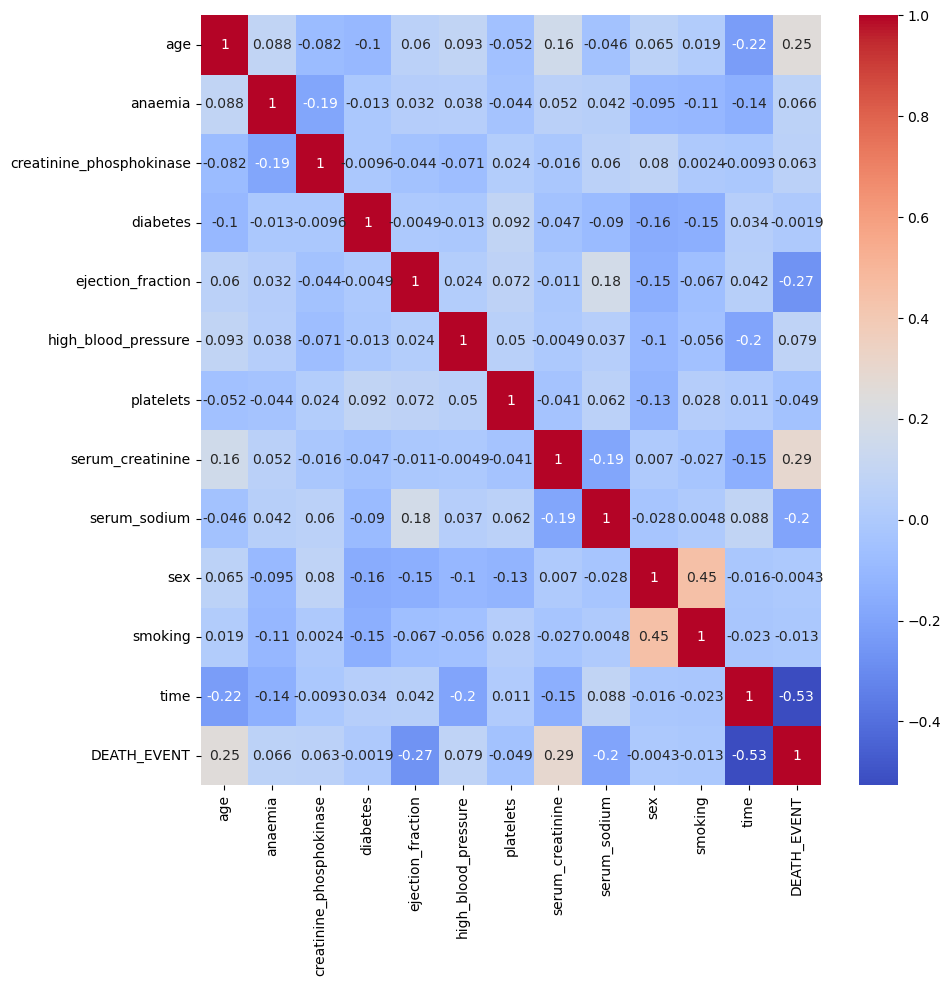

In [6]:
#vizualization dataset(feature selection)
#heatmap(correlation map)               

plt.figure(figsize=(10,10))
cor=df.corr()                                                                                 
sns.heatmap(cor, annot=True,cmap='coolwarm') 

In [ ]:
###we observed from heatmap(highly)
# +VE CORRELATION:-   DEATH_EVENT and serum creatinine , age. 
# -VE CORRELATION:-   DEATH_EVENT and time, ejection fraction , serum sodium.

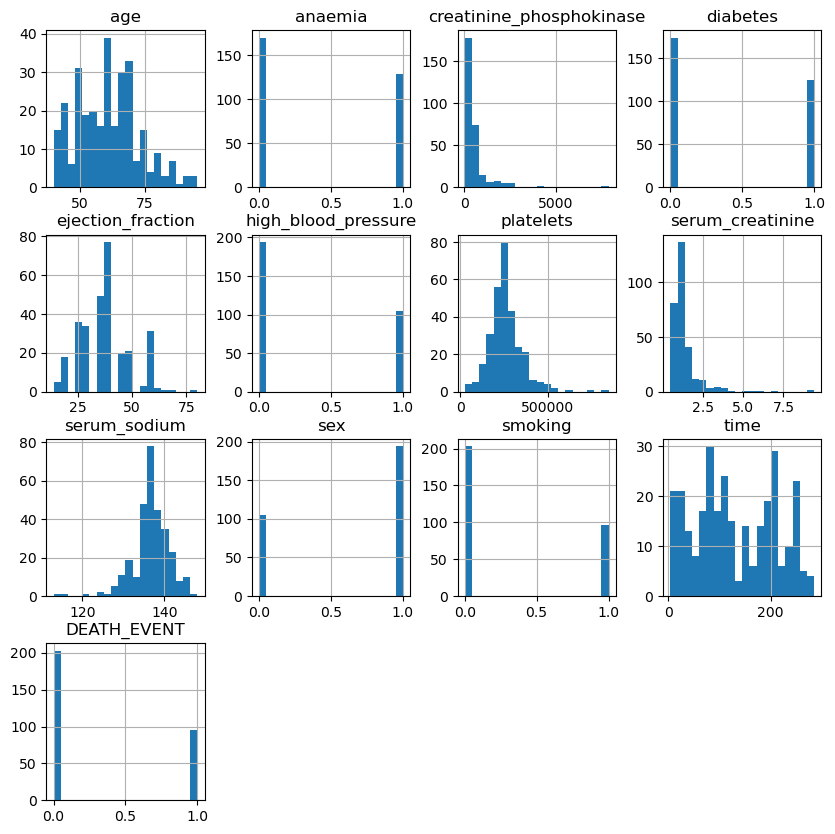

In [31]:
df.hist(bins=20, figsize=(10,10))
plt.show() 

In [37]:
#We split our dataset into two categories to make it easier for analysis
###based on df.head:-
# Data visualization:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]       

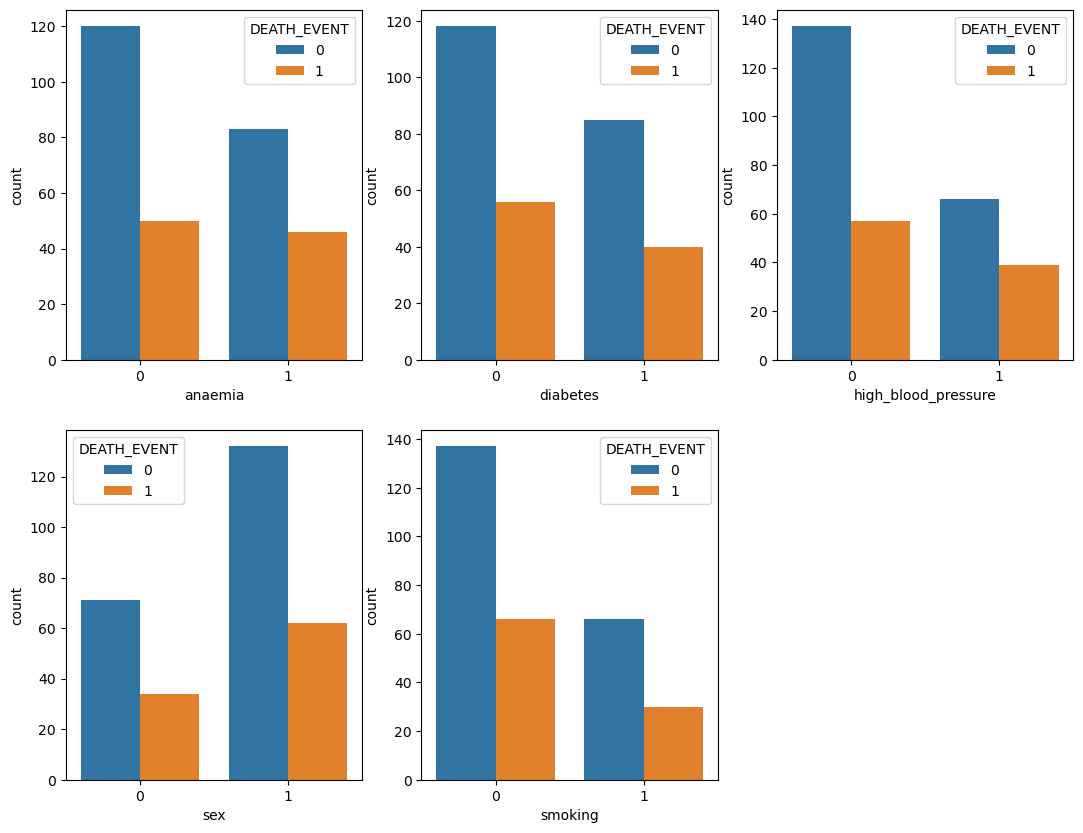

In [39]:
 # Plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x= cat, hue = "DEATH_EVENT")
plt.show()

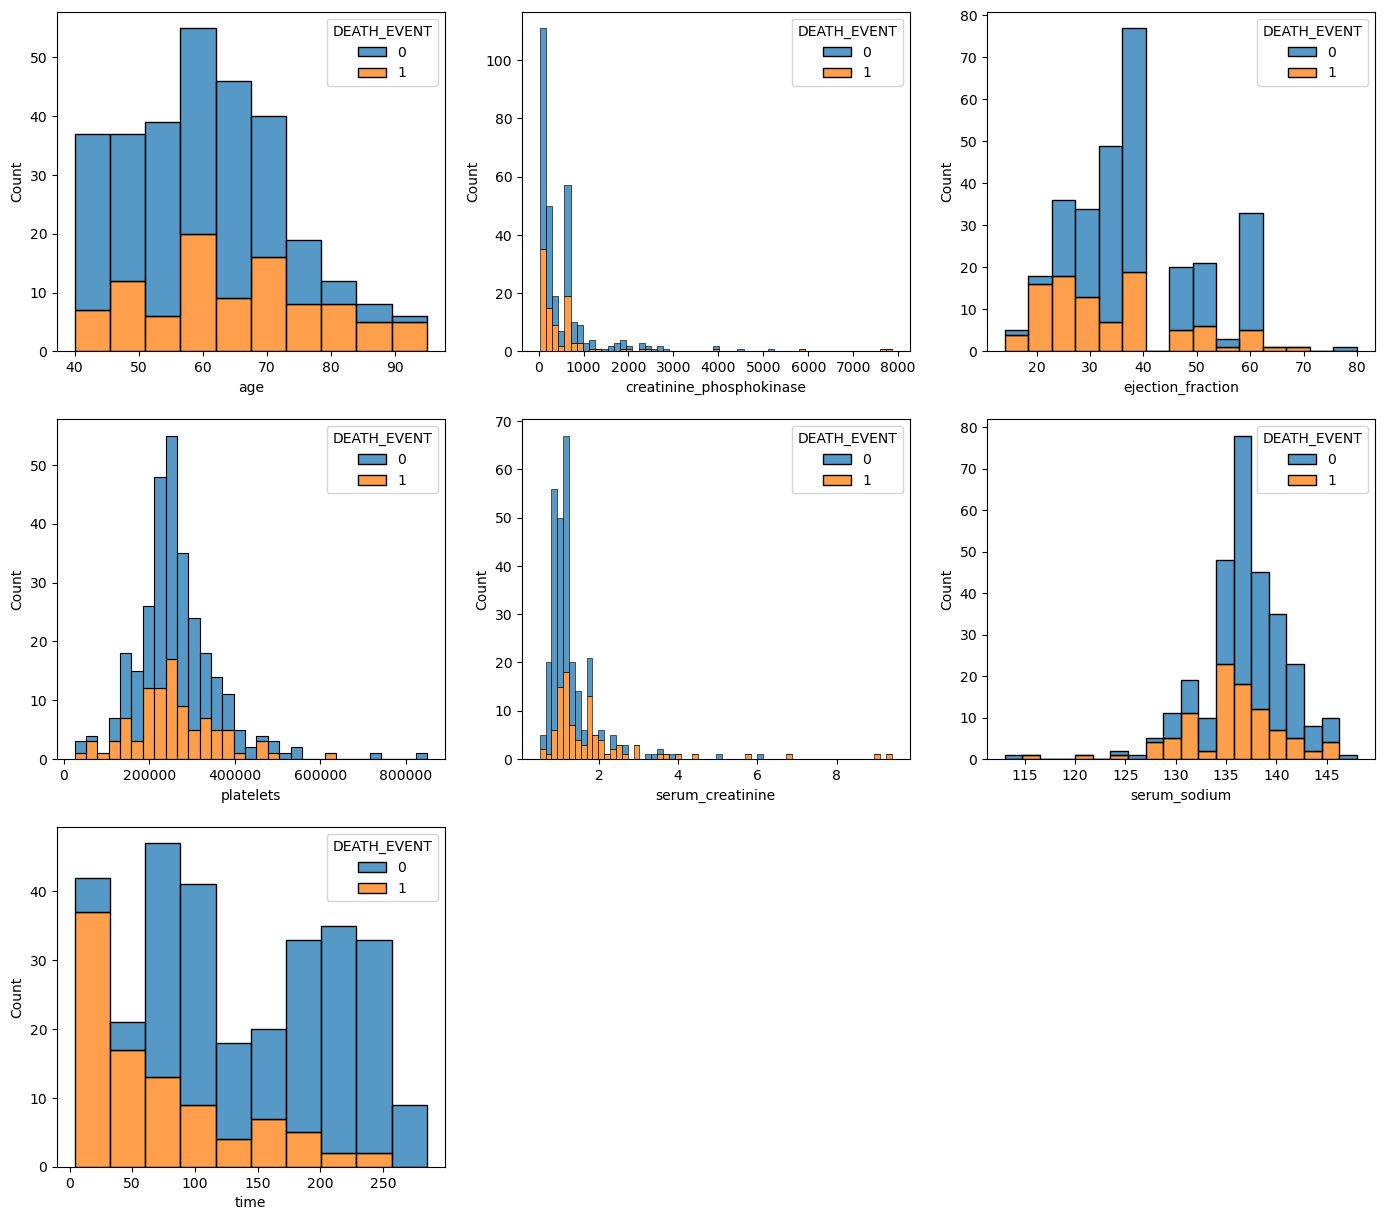

In [40]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)                                                                        
    sns.histplot(data = df, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

In [41]:
for i,cat in enumerate(continuous_data):
    print(i, cat)

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


In [42]:
for i,cat in enumerate(categorical_data):
    print(i, cat)

0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


In [7]:
#DATA MODELING
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
y=df["DEATH_EVENT"]
x=df.drop(["DEATH_EVENT"],axis=1)

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [10]:
### CLASSIFICATION ALGORITHMS

from sklearn.linear_model import LogisticRegression          #1
from sklearn.svm import SVC                                  #2
from sklearn.tree import DecisionTreeClassifier              #3
from sklearn.naive_bayes import GaussianNB                   #4
from sklearn.ensemble import RandomForestClassifier          #5
#from sklearn.neighbors import KNeighborsClassifier           #6

In [11]:
#1 Logistic Regression
LRM = LogisticRegression()                                                     
LRM.fit(xtrain, ytrain)
LRM_PRED = LRM.predict(xtest)

LR_accu = accuracy_score(LRM_PRED, ytest) 
print("Logistic Accuracy Score: ","{:.2f}%".format(100*LR_accu))                                                           

Logistic Accuracy Score:  85.56%


In [12]:
#2 Support Vector Machine
SVM = SVC()                                                             
SVM.fit(xtrain, ytrain)
SVM_PRED = SVM.predict(xtest)

SVM_accu = accuracy_score(SVM_PRED, ytest)
print("Support Vector Machine Accuracy Score: ","{:.2f}%".format(100*SVM_accu))                

Support Vector Machine Accuracy Score:  73.33%


In [13]:
#3 Decison Tree Classifier
DTCM = DecisionTreeClassifier(criterion="entropy", max_depth=2)               
DTCM.fit(xtrain, ytrain)
DTCM_pred = DTCM.predict(xtest)

DTCM_accu = accuracy_score(DTCM_pred, ytest)
print("Decison Tree Classifier Accuracy Score: ","{:.2f}%".format(100*DTCM_accu))

Decison Tree Classifier Accuracy Score:  88.89%


In [14]:
#4 Naive Bayes
NBM = GaussianNB()                                                         
NBM.fit(xtrain, ytrain)
NBM_pred = NBM.predict(xtest)

NBM_accu = accuracy_score(NBM_pred, ytest)
print("Naive Bayes Accuracy Score: ","{:.2f}%".format(100*NBM_accu))

Naive Bayes Accuracy Score:  85.56%


In [15]:
#5 Random Forest Classifier
RFM = RandomForestClassifier()                                          
RFM.fit(xtrain, ytrain)
RFM_pred = RFM.predict(xtest)

RFM_accu = accuracy_score(RFM_pred, ytest)
print("Random Forest Classifier Accuracy Score: ","{:.2f}%".format(100*RFM_accu))

Random Forest Classifier Accuracy Score:  92.22%


In [16]:
#1. Logistic Accuracy Score:  85.56%
#2. Support Vector Machine Accuracy Score:  73.33%
#3. Decison Tree Classifier Accuracy Score:  88.89%
#4. Naive Bayes Accuracy Score:  85.56%
#5. Random Forest Classifier Accuracy Score:  92.22%